In R, the fundamental data type is the vector.

Critical to working with vectors is an understanding of:

- recycling
- filtering
- vectorization



## Vector length is Immutable

In [1]:
x <- c(88,5,12,13)

In [2]:
x <- c(x[1:3], 168, x[4])

In [3]:
x

[1]  88   5  12 168  13

In [4]:
x <- c(x[1:3],x[5])

In [5]:
x

[1] 88  5 12 13

## Matrices are Vectors

Arrays and matrices are actually vectors. They merely have extra class attributes. A matrix is a vector that also has a number of rows and columns.

In [6]:
cbind(c(1,3),c(2,4))

1,2
3,4


In [7]:
cbind(c(1,3),c(2,4)) + 10:13

11,14
14,17


## Recycling

When applying an operation to two vectors that requires them to be the same length, R automatically **recycles**, or repeats, the shorter one, until it is long enough to match the longer one.

In [8]:
c(1,2,4) + c(6,0,9,20,22)

Warning message in c(1, 2, 4) + c(6, 0, 9, 20, 22):
“longer object length is not a multiple of shorter object length”

[1]  7  2 13 21 24

This is equivalent to 

In [9]:
c(1,2,4,1,2) + c(6,0,9,20,22)

[1]  7  2 13 21 24

This can be very useful for matrices.

In [10]:
m <- cbind(c(1,2,3),c(4,5,6))
m

1,4
2,5
3,6


In [11]:
m + c(1,2)

2,6
4,6
4,8


This is equivalent to 

In [12]:
m + c(1,2,1,2,1,2)

2,6
4,6
4,8


Here, $m$, a 3x2 matrix, is also a six-element vector, which in R is stored column by column.

The entire operation amounts to

$$
\left(\begin{matrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{matrix}\right) +
\left(\begin{matrix}1 & 2 \\ 2 & 1 \\ 1 & 2 \end{matrix}\right)
$$

## Vector Operations

Scalars are one-element vectors. So adding a scalar to a vector will result in the scalar being recycled to the proper length i.e. these two operations are equivalent

In [13]:
c(1,2,3) + 1

[1] 2 3 4

In [14]:
c(1,2,3) + c(1,1,1)

[1] 2 3 4

Furthermore, vector additions are applied element-wise in all cases

In [15]:
c(1,2,4) + c(5,0,-1)

[1] 6 2 3

### Vector Multiplication is Not What You Might Expect

In [16]:
c(1,2,4) * c(5,0,-1)

[1]  5  0 -4

The multiplication is applied element-wise. 

The dot product is performed using the `%*%` operator.

In [17]:
c(1,2,4) %*% c(5,0,-1)

1


### Every operator is by default applied element-wise

In [18]:
c(1,2,4) / c(5,4,-1)

[1]  0.2  0.5 -4.0

In [19]:
c(1,2,4) %% c(5,4,-1)

[1] 1 2 0

In [20]:
c(1,2,4) ** c(5,4,-1)

[1]  1.00 16.00  0.25

In [23]:
c(1,2,4) ^ 4

[1]   1  16 256

In [24]:
c(1,2,4) - c(5,4,-1)

[1] -4 -2  5

## Vector Indexing


Vector indexing is where we form a subvector by picking elements of the given vector for specific indices.

The format is `vector1[vector2]`, with the result that we select those elements of `vector1` whose indices are given in `vector2`.

In [25]:
y <- c(1.2,3.9,0.4,0.12)
y[c(1,3)]

[1] 1.2 0.4

In [27]:
y[2:4]

[1] 3.90 0.40 0.12

In [28]:
v <- c(2:4)

In [29]:
y[v]

[1] 3.90 0.40 0.12

In [30]:
y[c(1,1,1,3)]

[1] 1.2 1.2 1.2 0.4

Negative subscripts mean that we want to exclude the given elements in the output.

In [32]:
y

[1] 1.20 3.90 0.40 0.12

In [31]:
y[-1:-2]

[1] 0.40 0.12

In [33]:
y[1:(length(y)-1)]

[1] 1.2 3.9 0.4

In [38]:
y[1:-3]

ERROR: Error in y[1:-3]: only 0's may be mixed with negative subscripts


## Generating Vectors

####  with the `:` Operator

In [39]:
5:8

[1] 5 6 7 8

In [40]:
5:1

[1] 5 4 3 2 1

Mind your operator precedence.

In [41]:
i <- 10

In [45]:
1:i**2

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [43]:
1:(i-1)

[1] 1 2 3 4 5 6 7 8 9

#### `seq`

In [46]:
seq(12,30,by=3)

[1] 12 15 18 21 24 27 30

In [47]:
seq(1.1,2,length=10)

[1] 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0

#### `rep`

In [48]:
rep(8,4)

[1] 8 8 8 8

In [49]:
rep(c(5,12,13),3)

[1]  5 12 13  5 12 13  5 12 13

In [50]:
rep(1:3,2)

[1] 1 2 3 1 2 3

In [51]:
rep(c(5,12,13),each=2)

[1]  5  5 12 12 13 13

## Logical Operators

In [52]:
x <- 1:10

In [53]:
x > 4

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [54]:
any(x > 4)

[1] TRUE

In [55]:
all(x > 4)

[1] FALSE

#### Creating a RELU with a logical operator

A [rectified linear unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) or RELU is using commonly in neural networks.

<img src=https://upload.wikimedia.org/wikipedia/en/thumb/6/6c/Rectifier_and_softplus_functions.svg/495px-Rectifier_and_softplus_functions.svg.png width=300px>

In [56]:
x <- seq(-5,5,length=20)

In [57]:
x * (x > 0)

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 0.2631579 0.7894737 1.3157895 1.8421053
[15] 2.3684211 2.8947368 3.4210526 3.9473684 4.4736842 5.0000000

In [58]:
library(repr)
options(repr.plot.width=12, repr.plot.height=4)

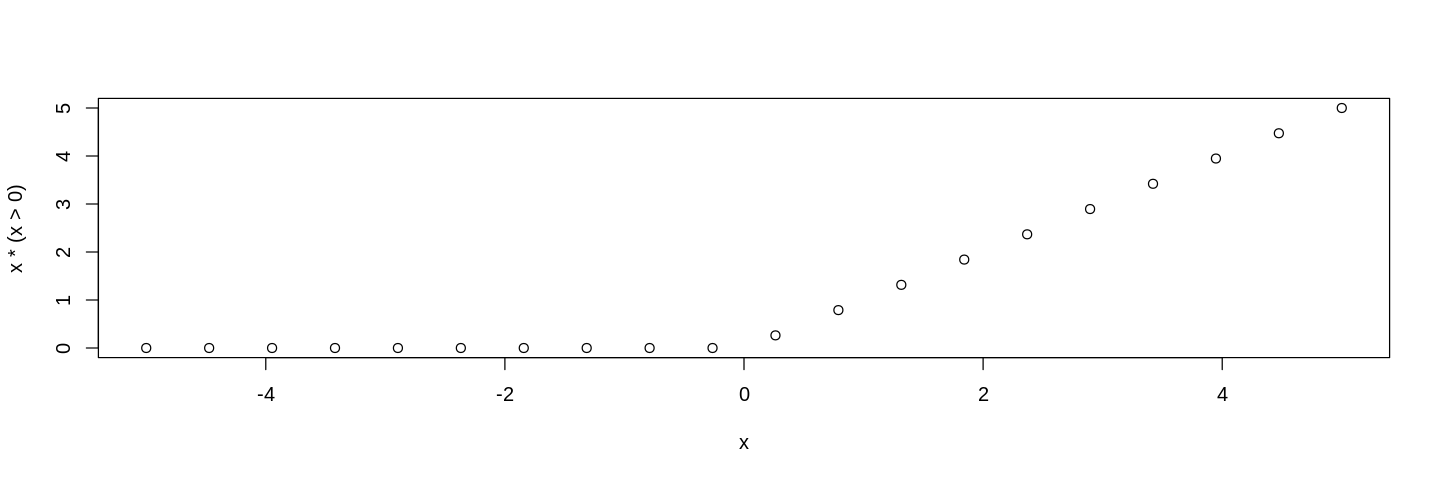

In [59]:
plot(x, x * (x > 0))